In [ ]:
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols, usecols=range(3))
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [ ]:
import numpy as np

movieProp = ratings.groupby('movie_id').agg({'rating': ['size', 'mean']})
movieProp.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [ ]:
movieNumRatings = pd.DataFrame(movieProp['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
1,0.773585
2,0.222985
3,0.152659
4,0.356775
5,0.145798


In [ ]:
movieDict = {}
with open(r'u.item', errors='ignore') as f:
    for line in f:
            fields = line.rstrip('\n').split('|')
            movieID = int(fields[0])
            name = fields[1]
            genres = fields[5:25]
            genres = map(int, genres)
            if movieID in movieNormalizedNumRatings.index and movieID in movieProp.index:
                movieDict[movieID] = (name, list(genres), movieNormalizedNumRatings.loc[movieID].get('size'), movieProp.loc[movieID].rating.get('mean'))
            else:
                print(f"Erro: movieID {movieID} não encontrado.")

In [ ]:
movieDict[1]

('Toy Story (1995)',
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0.7735849056603774,
 3.8783185840707963)

In [ ]:
from scipy import spatial

def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [ ]:
ComputeDistance(movieDict[2], movieDict[4])

0.8004574042309892

In [ ]:
print(movieDict[2])
print(movieDict[4])

('GoldenEye (1995)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.22298456260720412, 3.2061068702290076)
('Get Shorty (1995)', [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.3567753001715266, 3.550239234449761)


In [ ]:
import operator

def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K = 10
avgRating = 0
neighbors = getNeighbors(1, K)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

avgRating /= float(K)

Liar Liar (1997) 3.156701030927835
Aladdin (1992) 3.8127853881278537
Willy Wonka and the Chocolate Factory (1971) 3.6319018404907975
Monty Python and the Holy Grail (1974) 4.0664556962025316
Full Monty, The (1997) 3.926984126984127
George of the Jungle (1997) 2.685185185185185
Beavis and Butt-head Do America (1996) 2.7884615384615383
Birdcage, The (1996) 3.4436860068259385
Home Alone (1990) 3.0875912408759123
Aladdin and the King of Thieves (1996) 2.8461538461538463


In [ ]:
avgRating

3.3445905900235564

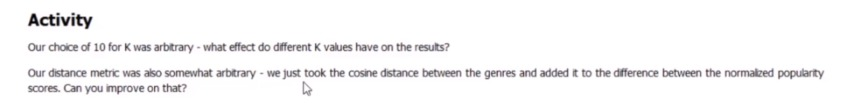